In [32]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [33]:
def dnn_model():
    input = Input(shape = (1,))
    x = Dense(32, activation = 'relu')(input)
    x = Dense(64, activation = 'relu')(x)
    x = Dense(128, activation = 'relu')(x)
    output = Dense(1, activation = 'tanh')(x)

    model = Model(input, output, name = 'Regression_model')
    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['r2_score'])
    return model

In [34]:
model = dnn_model()
model.summary()

Model: "Regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
def f(x):
    return 5*x**3 - 8*x**2 - 7*x + 1

In [36]:
import numpy as np
x = np.linspace(-20, 20, 1000)
y = f(x)

In [37]:
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)

x = 2 * ((x - x_min) / (x_max - x_min)) - 1
y = 2 * ((y - y_min) / (y_max - y_min)) - 1

print(x[:10])
print(y[:10])

[-1.         -0.997998   -0.995996   -0.99399399 -0.99199199 -0.98998999
 -0.98798799 -0.98598599 -0.98398398 -0.98198198]
[-1.         -0.99367087 -0.98736646 -0.98108673 -0.97483163 -0.96860112
 -0.96239514 -0.95621365 -0.95005659 -0.94392393]


In [38]:
from sklearn.model_selection import train_test_split

train_x, tv_x, train_y, tv_y = train_test_split(x, y, test_size = 0.10, random_state = 42)
test_x, val_x, test_y, val_y = train_test_split(tv_x, tv_y, test_size = 0.5, random_state = 42)

In [39]:
history = model.fit(train_x, train_y, epochs = 10, batch_size = 4, validation_data = (val_x, val_y))

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0410 - r2_score: 0.7330 - val_loss: 0.0044 - val_r2_score: 0.9652
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - r2_score: 0.9664 - val_loss: 0.0015 - val_r2_score: 0.9884
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - r2_score: 0.9864 - val_loss: 6.0488e-04 - val_r2_score: 0.9952
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - r2_score: 0.9900 - val_loss: 6.5150e-04 - val_r2_score: 0.9948
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3025e-04 - r2_score: 0.9957 - val_loss: 3.6952e-04 - val_r2_score: 0.9971
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8790e-04 - r2_score: 0.9939 - val_loss: 4.1611e-04 - val_r2_score: 0.9967
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2516e-04 - r2_score: 0.9954 - val_loss: 7.0645e-04 - val_r2_score: 0.9944
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4441e-04 -

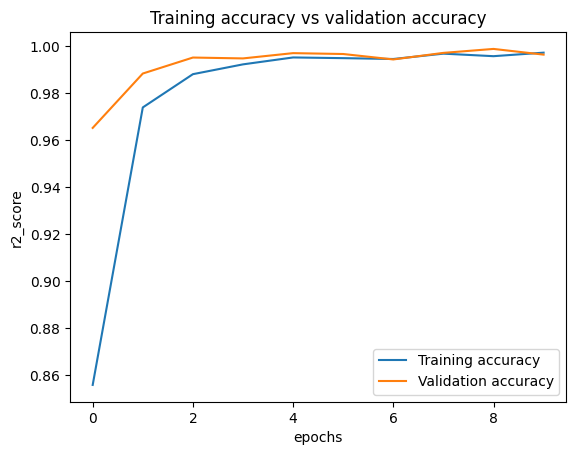

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['r2_score'], label = 'Training accuracy')
plt.plot(history.history['val_r2_score'], label = 'Validation accuracy')
plt.title('Training accuracy vs validation accuracy')
plt.xlabel('epochs')
plt.ylabel('r2_score')
plt.legend()
plt.show()

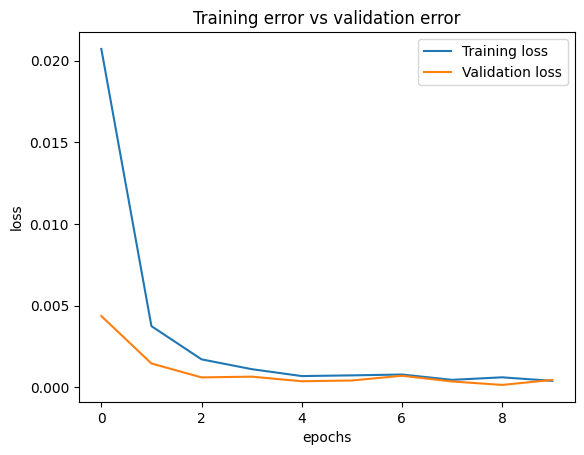

In [41]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Training error vs validation error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [42]:
pred_y = model.predict(test_x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [43]:
model.evaluate(test_x, test_y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8653e-04 - r2_score: 0.9971 


[0.0005171542870812118, 0.9967747926712036]

In [44]:
test_x = ((test_x + 1) * (x_max - x_min) / 2) + x_min
test_y = ((test_y + 1) * (y_max - y_min) / 2) + y_min
pred_y = ((pred_y + 1) * (y_max - y_min) / 2) + y_min

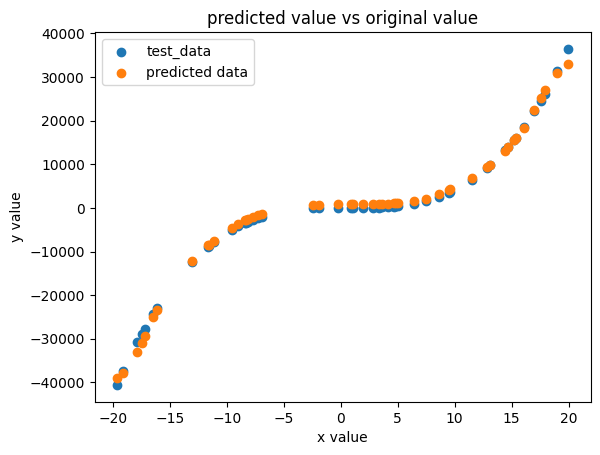

In [46]:
plt.scatter(test_x, test_y, label = 'test_data')
plt.scatter(test_x, pred_y, label = 'predicted data')
plt.title('predicted value vs original value')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()